In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error, r2_score, classification_report

In [25]:
# Load dataset
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

#  Data Preprocessing / Exploratory Data Analysis (EDA)

In [26]:
# Clean column names (strip any leading/trailing spaces)
df.columns = df.columns.str.strip()

In [27]:
print("Dataset Shape:", df.shape)  # Rows and Columns

Dataset Shape: (5000, 14)


In [28]:
print("Dataset Columns:", df.columns)

Dataset Columns: Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')


In [29]:
print("First 5 rows:\n")
df.head()

First 5 rows:



,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [30]:

# Check for Missing Values
print("Missing Values in each column:\n", df.isnull().sum())

Missing Values in each column:
 ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


In [31]:
# Drop unnecessary columns (e.g., ID, ZIP Code)
df = df.drop(['ID', 'ZIP Code'], axis=1)

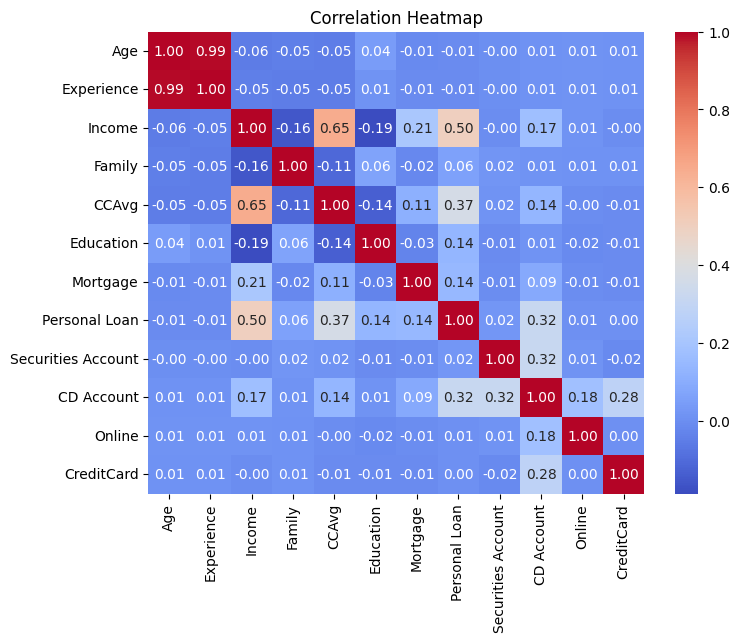

In [32]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [33]:
# Handle missing values
df.dropna(inplace=True)

In [34]:
# Encoding categorical variables if any
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


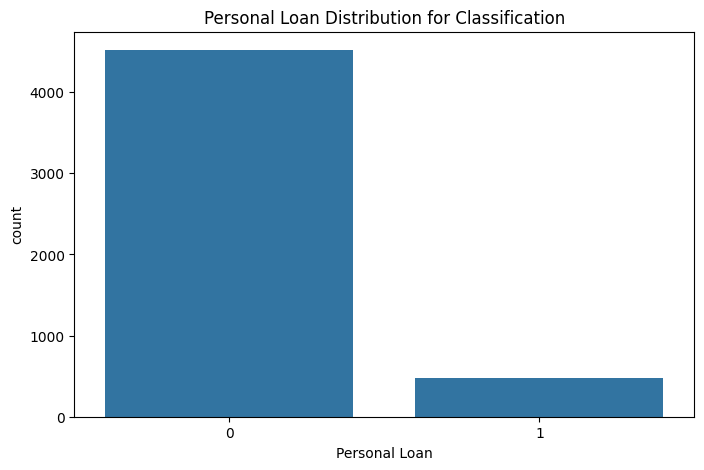

In [35]:
# Distribution of the target variable for classification
plt.figure(figsize=(8, 5))
sns.countplot(x='Personal Loan', data=df)
plt.title("Personal Loan Distribution for Classification")
plt.show()

In [36]:
# Count Personal Loan values 0
print((df['Personal Loan'] == 0).sum())

4520


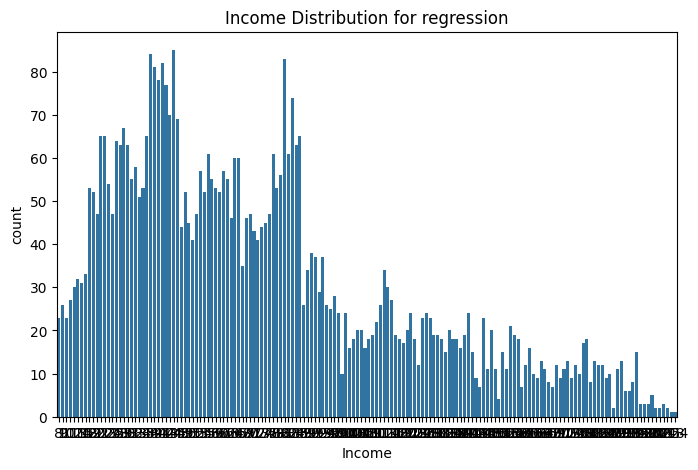

In [37]:
# Distribution of the target variable for regression
plt.figure(figsize=(8, 5))
sns.countplot(x='Income', data=df)
plt.title("Income Distribution for regression")
plt.show()

# Implement SVM

In [38]:

# Normalization
scaler = StandardScaler()
X = df.drop(columns=['Personal Loan'])  # Features
y_classification = df['Personal Loan']  # Classification target
y_regression = df['Income']  # Regression target
X_scaled = scaler.fit_transform(X)

In [39]:

# Splitting data
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_scaled, y_classification, test_size=0.2, random_state=42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_scaled, y_regression, test_size=0.2, random_state=42)

In [40]:
# SVM Classification
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_c, y_train_c)
y_pred_c = svm_classifier.predict(X_test_c)

# Classification Metrics
print("Classification Metrics:")
print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("Precision:", precision_score(y_test_c, y_pred_c))
print("Recall:", recall_score(y_test_c, y_pred_c))
print("F1-score:", f1_score(y_test_c, y_pred_c))
print("Confusion Matrix:\n", confusion_matrix(y_test_c, y_pred_c))

Classification Metrics:
Accuracy: 0.953
Precision: 0.9142857142857143
Recall: 0.6095238095238096
F1-score: 0.7314285714285714
Confusion Matrix:
 [[889   6]
 [ 41  64]]


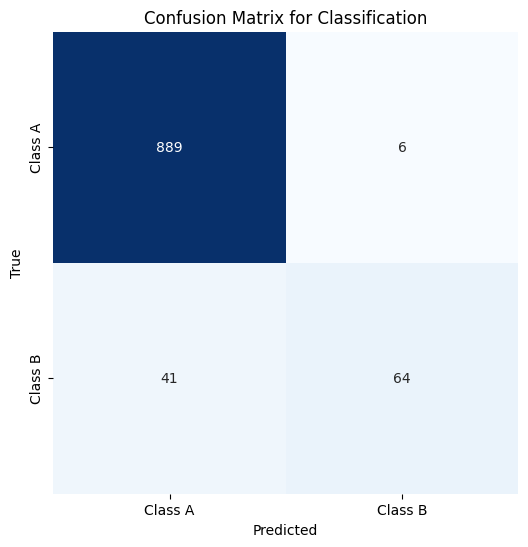

In [41]:
# Confusion Matrix for Classification (Optional)

conf_matrix = confusion_matrix(y_test_c, y_pred_c)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class A', 'Class B'], yticklabels=['Class A', 'Class B'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Classification')
plt.show()

In [42]:
# SVM Regression
svm_regressor = SVR(kernel='linear')
svm_regressor.fit(X_train_r, y_train_r)
y_pred_r = svm_regressor.predict(X_test_r)

# Regression Metrics
mse = mean_squared_error(y_test_r, y_pred_r)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_r, y_pred_r)
print("\nRegression Metrics:")
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


Regression Metrics:
MSE: 0.003289906746299113
RMSE: 0.05735770869115252
R² Score: 0.9999984485384186


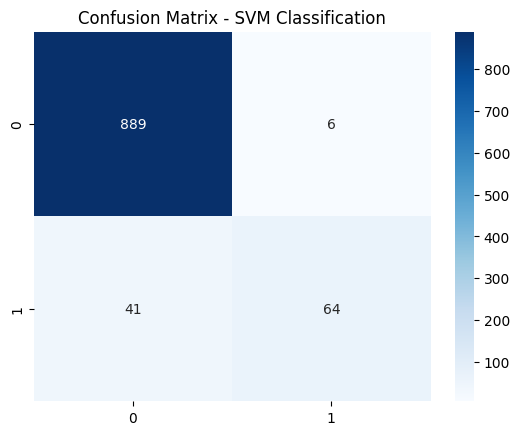

In [43]:

# Visualization
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test_c, y_pred_c), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM Classification")
plt.show()

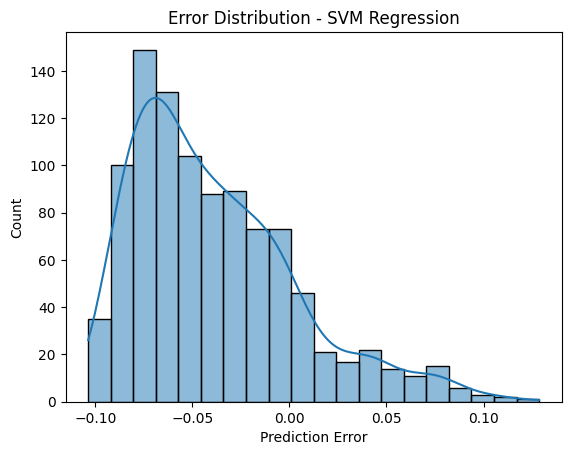

In [44]:
# Error Distribution
sns.histplot(y_test_r - y_pred_r, kde=True, bins=20)
plt.title("Error Distribution - SVM Regression")
plt.xlabel("Prediction Error")
plt.show()